In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import missingno as msno

In [148]:
cwd = os.getcwd()
print(os.listdir(cwd))

['.ipynb_checkpoints', 'advertising_dsdj.csv', 'Advertising_Rui.ipynb', 'Bubble map.ipynb', 'world-countries.json']


## 1. Data collection and cleaning

In [149]:
df = pd.read_csv('advertising_dsdj.csv')

In [150]:
country_geo = 'world-countries.json'

In [151]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0.0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0.0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0.0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0.0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0.0


In [152]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [153]:
df.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
1013,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49,1.0
1014,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 2:07,1.0
1015,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24,1.0
1016,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 2:35,0.0
1017,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43,1.0


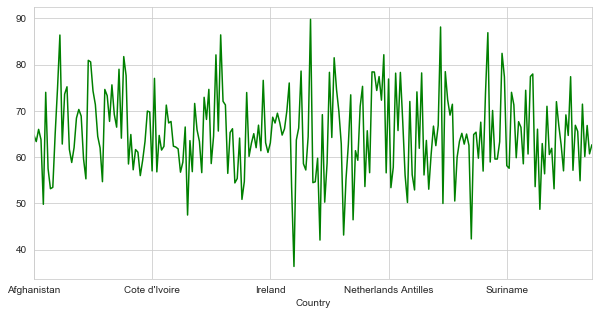

In [154]:
plt.figure(figsize=(10,5))
df.groupby(['Country']).mean()['Daily Time Spent on Site'].plot(c='green')


In [155]:
import json

with open('world-countries.json') as f:
    geo = json.load(f)

In [156]:
data = df.groupby(['Country']).mean()[['Daily Time Spent on Site']]
data['Country'] = data.index
data.set_index(np.arange(0, len(data)), inplace=True)

In [157]:
data = data.reindex(columns=['Country','Daily Time Spent on Site'])

In [158]:
import folium
map = folium.Map(location=[0, 0], zoom_start=1.5)

In [159]:
m = folium.Choropleth(
             geo_data=country_geo, 
             data=data,
             columns=['Country', 'Daily Time Spent on Site'],
             key_on='feature.properties.name',
             fill_color='YlGnBu', 
             fill_opacity=0.7,
             line_opacity=0.2,
             legend_name='Time On Line').add_to(map)

In [160]:
map

### 1.1 Missing value detection

In [161]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1014.000000
mean,64.999921,36.936149,54983.348988,179.381906,0.481336,0.500986
std,15.871054,31.566241,13445.569214,44.417978,0.499897,0.500246
min,32.600000,-25.000000,13996.500000,23.640000,0.000000,0.000000
25%,51.320000,29.000000,46966.620000,138.582500,0.000000,0.000000
50%,68.105000,35.000000,57023.600000,182.425000,0.000000,1.000000
75%,78.562500,42.000000,65451.787500,218.207500,1.000000,1.000000
max,91.430000,999.000000,79484.800000,269.960000,1.000000,1.000000


In [162]:
## Describution calculation --> 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 10 columns):
Daily Time Spent on Site    1018 non-null float64
Age                         1018 non-null int64
Area Income                 1018 non-null float64
Daily Internet Usage        1018 non-null float64
Ad Topic Line               1018 non-null object
City                        1018 non-null object
Male                        1018 non-null int64
Country                     1018 non-null object
Timestamp                   1018 non-null object
Clicked on Ad               1014 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 79.6+ KB


- As we can see, there is missing value in the data file
- df.info() function is not that informative, and be careful with the number of `Clicked on Ad`

In [163]:
import seaborn as sns
df.isnull().any()

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Ad Topic Line               False
City                        False
Male                        False
Country                     False
Timestamp                   False
Clicked on Ad                True
dtype: bool

In [164]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               4
dtype: int64

- Visualization for the dataset

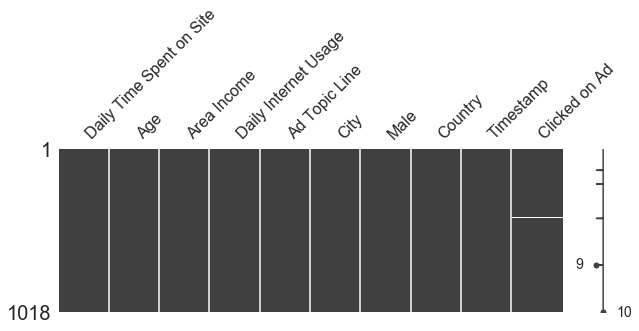

In [165]:
msno.matrix(df, figsize=(10,3))

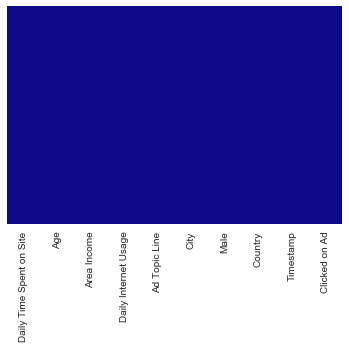

In [166]:
sns.heatmap(df.isnull() == True, cbar=False, yticklabels=False, cmap='plasma')

In [167]:
df[df['Clicked on Ad'].isnull() == True]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
131,67.36,37,73104.47,233.56,Future-proofed grid-enabled implementation,North Wesleychester,0,Jersey,2016-07-06 16:00,NaN
217,67.28,43,76246.96,155.80,Future-proofed coherent hardware,North Mercedes,1,Pakistan,2016-04-03 21:13,NaN
431,34.30,41,53167.68,160.74,Re-contextualized reciprocal interface,West Melaniefurt,1,Libyan Arab Jamahiriya,2016-05-16 14:50,NaN
722,46.89,48,72553.94,176.78,Polarized mission-critical structure,Chaseshire,1,Turkey,2016-07-17 13:22,NaN


* Drop NAN value

In [227]:
df.dropna(inplace=True)

In [228]:
df.isnull().any()

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Ad Topic Line               False
City                        False
Male                        False
Country                     False
Timestamp                   False
Clicked on Ad               False
dtype: bool

In [170]:
df.shape

(1014, 10)

- Now the dataset has 1014 training set, and 9 features plus 1 label

### 1.2 Distribution and outlier detection

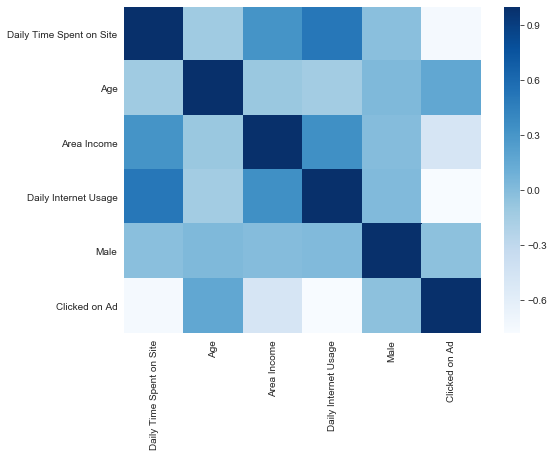

In [171]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='Blues', annot=False)

- Outlier checking

In [172]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

<Figure size 720x360 with 0 Axes>

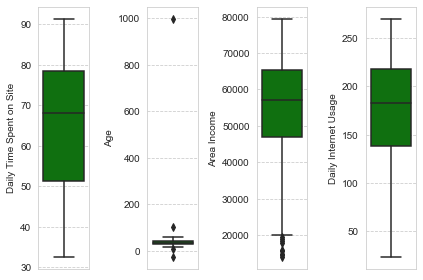

In [173]:
plt.figure(figsize=(10,5))
l = df.columns.values[:4]
number_of_columns = 5
# we have 1 label in the dataset
number_of_rows = (len(l))/number_of_columns
plt.figure(figsize=(1.5*number_of_columns, 5*number_of_rows))

for i in range(0, len(l)):
    plt.subplot(number_of_rows+1, number_of_columns, i+1)
    ax = plt.gca()
    ax.yaxis.grid(True, which='Major', linestyle='--')
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]], color='green', orient='v')
plt.tight_layout()

- As we can see that, the outliers are in Age and Area Income
- Get the outlier using IQR

- The distribution of the Age

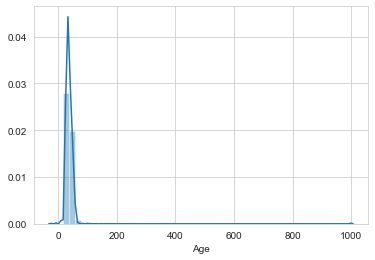

In [174]:
sns.distplot(df['Age'])

- The right skewed Area Income

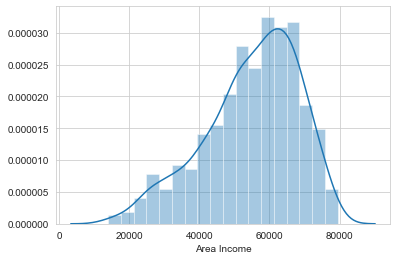

In [175]:
sns.distplot(df['Area Income'])

- Define IQR outlier remove method for the calculation

## WHY INTRODUCE THE NAN VALUE ???

In [211]:
# We define a outlier remove function

def iqr_outlier_rm(df_input):
    # use the np.percentile as the indicator
    # lq, uq = np.percentile(df_input, [25, 75])
    quantile = df_input.quantile([.25, .75], axis=0)
    lq, uq = quantile.iloc[0], quantile.iloc[1]
    IQR = uq - lq
    lower = lq - 1.5 * IQR
    upper = uq + 1.5 * IQR
    return df_input[(df_input >= lower)&(df_input <= upper)]

In [ ]:
# remove outlier in the dataframe

In [208]:
df_outlier_rm = iqr_outlier_rm(df[df.columns[:4]])

<Figure size 720x360 with 0 Axes>

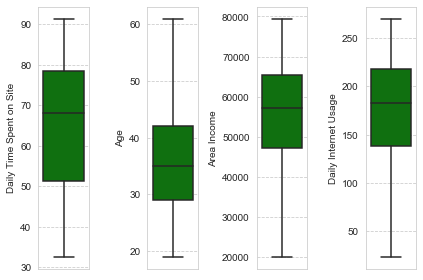

In [210]:
plt.figure(figsize=(10,5))
l = df_outlier_rm.columns.values
number_of_columns = 5
# we have 1 label in the dataset
number_of_rows = (len(l))/number_of_columns
plt.figure(figsize=(1.5*number_of_columns, 5*number_of_rows))

for i in range(0, len(l)):
    plt.subplot(number_of_rows+1, number_of_columns, i+1)
    ax = plt.gca()
    ax.yaxis.grid(True, which='Major', linestyle='--')
    sns.set_style('whitegrid')
    sns.boxplot(df_outlier_rm[l[i]], color='green', orient='v')
plt.tight_layout()

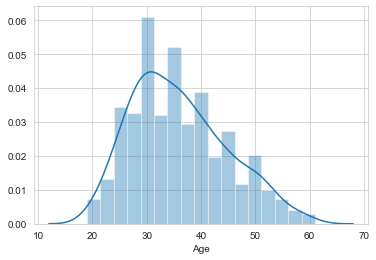

In [244]:
sns.distplot(df_outlier_rm['Age'])

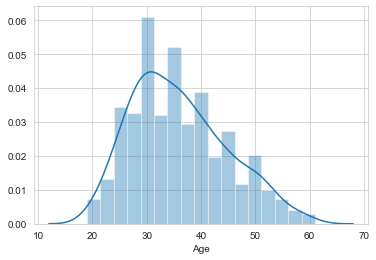

In [241]:
sns.distplot(df_outlier_rm['Age'])

In [243]:
df_outlier_rm['Age'].isnull().sum()

0

In [231]:
df_outlier_rm['Area Income'].shape

(1014,)

In [238]:
df_outlier_rm.dropna(inplace=True)

In [245]:
df_outlier_rm

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,68.95,35.0,61833.90,256.09
1,80.23,31.0,68441.85,193.77
2,69.47,26.0,59785.94,236.50
3,74.15,29.0,54806.18,245.89
4,68.37,35.0,73889.99,225.58
5,59.99,23.0,59761.56,226.74
6,88.91,33.0,53852.85,208.36
7,66.00,48.0,24593.33,131.76
8,74.53,30.0,68862.00,221.51
9,69.88,20.0,55642.32,183.82
